In [152]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import symbols, sympify, lambdify, compose, I, pi, log, exp, simplify
from sympy.abc import x
import time
from statistics import mean


In [153]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

In [154]:
poblacion_base = ['(x+1)', 'x**x', '0.5']

operaciones_base = ['*', '+', '-', 'comp']

In [155]:
def Creador(num_poblacion_inicial, poblacion_base, operaciones):
    '''
    Creador recibe: 
    1. El numero de individuos que se desea que tenga la poblacion inicial
    2. Una lista con funciones base cuyas combinaciones crearan la poblacion inicial
    3. una lista con operaciones que actuarán sobre las funciones al momento de combinarlas
    '''
    poblacion_inicial= []
    for n in range(num_poblacion_inicial):
        expresion1 = random.choice(poblacion_base)
        expresion2 = random.choice(poblacion_base)
        operacion = random.choice(operaciones)
        if operacion == 'comp':
            # Se pasan a funciones sympy
            x = symbols('x')
            expresiones = [expresion1, expresion2]
            expresiones_sympy = [sympify(exp) for exp in expresiones] 
            f1 = expresiones_sympy[0]
            f2 = expresiones_sympy[1]
            # Se componen expresiones
            composicion = f1.subs(x, f2)
            poblacion_inicial.append(str(composicion))
        else: 
            expresion = f"{expresion1} {operacion} {expresion2}"
            poblacion_inicial.append(expresion)
            
    return poblacion_inicial

In [156]:
A = Creador(20, poblacion_base, operaciones_base)

In [157]:
def Calculador_Chi(poblacion_inicial, valores_observados, H, desv):
    Chi = []
    x = symbols('x', real=True)
    expresiones_sympy = [sympify(exp) for exp in poblacion_inicial]
    funciones_python = [lambdify(x, expresion, 'numpy') for expresion in expresiones_sympy]

    for funcion in funciones_python:
        f = funcion(valores_observados)
        chi_value = np.sum(((f - H) / desv) ** 2)
        Chi.append(chi_value)

    return np.array(Chi)

def Calculador_Chi (poblacion_inicial, valores_observados, H, desv):
    Chi = []
    x = symbols('x', real = True)
    expresiones_sympy = [sympify(exp) for exp in poblacion_inicial]

    for n in range(0, len(expresiones_sympy)):
        expr1 = expresiones_sympy[n]
        f = np.array([expr1.subs(x, valor) for valor in valores_observados])
        Chi.append(np.sum(((f - H)/desv)**2))

    return np.array(Chi)


In [158]:
B = Calculador_Chi(A, z, H, desv)

print(B)

[4295.51783627 4255.31169824 4106.37809527 4314.6775362  4356.22576219
 4213.29253111 3898.33954897 4306.79563341 4116.42734998 4376.56806252
 4173.33557645 4293.84439062 4213.29253111 4319.16881538 4074.8969936
 4293.84439062 4392.75381498 4074.8969936  4356.22576219 4356.22576219]


In [159]:
def Seleccionador(poblacion_inicial, Chi, porcentaje_seleccion):

    porcentaje_seleccion = float(porcentaje_seleccion)
    seleccion = np.percentile(Chi, porcentaje_seleccion)

    print('Los chi son: ' + str(Chi))
    print('El chi menor fue: ' + str(min(Chi)))
    print('El chi MAYOR fue: ' + str(max(Chi)))
    print('La seleccion fue: ' + str(seleccion))

    Chi_seleccionados = Chi[Chi <= seleccion]
    indices = np.where(Chi <= seleccion)[0]
    funciones_seleccionadas = [poblacion_inicial[i] for i in range(len(Chi)) if Chi[i] <= seleccion]

    combined_data = list(zip(Chi_seleccionados, funciones_seleccionadas))

    # Ordena la lista combinada por los elementos de x
    sorted_combined_data = sorted(combined_data, key=lambda pair: pair[0])

    # Desempaqueta los resultados ordenados
    Chis, funciones = zip(*sorted_combined_data)

    Chis = list(Chis)
    print(Chis)
    Funciones_seleccionadas = list(funciones)

    return Funciones_seleccionadas

In [160]:
C = Seleccionador(A, B, 20)

print(C)

print(len(C))

Los chi son: [4295.51783627 4255.31169824 4106.37809527 4314.6775362  4356.22576219
 4213.29253111 3898.33954897 4306.79563341 4116.42734998 4376.56806252
 4173.33557645 4293.84439062 4213.29253111 4319.16881538 4074.8969936
 4293.84439062 4392.75381498 4074.8969936  4356.22576219 4356.22576219]
El chi menor fue: 3898.3395489737327
El chi MAYOR fue: 4392.7538149843485
La seleccion fue: 4114.417499042499
[3898.3395489737327, 4074.8969935952446, 4074.8969935952446, 4106.378095273011]
['x**x * x**x', 'x**x * (x+1)', 'x**x * (x+1)', '(x+1) * (x+1)']
4


In [161]:
def Reproductor(Funciones_seleccionadas, porcentaje_mutacion, poblacion_base, operaciones): 

    combinados = []
    funciones_a_combinar = Funciones_seleccionadas

    for n in range(0, len(funciones_a_combinar)):
        expresion1 = funciones_a_combinar[n]
        expresion2 = random.choice(funciones_a_combinar)
        expresion3 = random.choice(funciones_a_combinar)
        expresion4 = random.choice(funciones_a_combinar)
        expresion5 = random.choice(funciones_a_combinar)

        operacion = random.choice(operaciones)
        operacion2 = random.choice(operaciones[0:-2])
        operacion3 = random.choice(operaciones[0:-2])
        operacion4 = random.choice(operaciones[0:-2])

        if operacion == 'comp':
            # Se pasan a funciones sympy
            x = symbols('x')
            expresiones = [expresion1, expresion2]
            expresiones_sympy = [sympify(exp) for exp in expresiones] 
            f1 = expresiones_sympy[0]
            f2 = expresiones_sympy[1]
            composicion = f1.subs(x, f2)
            combinados.append(str(composicion))
        else: 
            hijo1 = f"{expresion1} {operacion} {expresion2}"
            combinados.append(hijo1)
        
        hijo2 = f"{expresion1} {operacion2} {expresion3}"
        combinados.append(hijo2)
        hijo3 = f"{expresion1} {operacion3} {expresion4}"
        combinados.append(hijo3)
        hijo4 = f"{expresion1} {operacion3} {expresion5}"
        combinados.append(hijo4)


    combinados = np.array(combinados)

    # EMPIEZA MUTACION
    num_mutacion = int(len(combinados)*(porcentaje_mutacion/100))
    funciones_a_mutar = []
    mutaciones = []

    for n in range(0, num_mutacion): 
        if n == 0:
            expresion_m = random.choice(combinados)
            funciones_a_mutar.append(expresion_m)
        else:
            expresion_m = random.choice(combinados)
            while expresion_m in funciones_a_mutar:
                expresion_m = random.choice(combinados)
            funciones_a_mutar.append(expresion_m)

        operacion = random.choice(operaciones)
        expresion2 = random.choice(poblacion_base)

        if operacion == 'comp':
            x = symbols('x')
            expresiones = [expresion_m, expresion2]
            expresiones_sympy = [sympify(exp) for exp in expresiones] 
            f1 = expresiones_sympy[0]
            f2 = expresiones_sympy[1]
            # Se componen expresiones
            composicion = f1.subs(x, f2)
            mutaciones.append(str(composicion))
        else: 
            expresion = f"{expresion_m} {operacion} {expresion2}"
            mutaciones.append(expresion)

    indices_no_mutados = np.array([i for i, elem in enumerate(combinados) if elem not in funciones_a_mutar])
    funciones_sin_mutar = combinados[indices_no_mutados]
    funciones_sin_mutar = funciones_sin_mutar.tolist()
    mutaciones += funciones_sin_mutar 

    print(type(mutaciones))

    return mutaciones

In [162]:
D = Reproductor(C, 50, poblacion_base, operaciones_base)

print(D)

print(len(D))

<class 'list'>
['(x+1) * (x+1) + x**x * (x+1) - x**x', 'x**x * (x+1) + x**x * x**x - x**x', '2*(x**x + 1)*(x**x)**(x**x)', '(x**x + 1)**3*(x**x)**(x**x)', '(x+1) * (x+1) + (x+1) * (x+1) - (x+1)', 'x**x * (x+1) * x**x * x**x - (x+1)', 'x**x * x**x + x**x * (x+1) - x**x', '(x+1) * (x+1) * x**x * x**x * (x+1)', 'x**x * x**x - x**x * x**x', 'x**x * x**x * (x+1) * (x+1)', 'x**x * x**x + (x+1) * (x+1)', 'x**x * (x+1) - x**x * (x+1)', 'x**x * (x+1) + (x+1) * (x+1)']
13


In [163]:
def GA_2(num_generaciones, num_poblacion_inicial, operaciones, poblacion_base, porcentaje_seleccion, porcentaje_mutacion, z, H, desv):
    
    Poblacion = []
    Seleccion_funciones = []
    Seleccion_Chi = []
    Generacion = []
    
    for n in range(0, num_generaciones):
        print('Número de Generación:' +str(n))
        if n == 0:

            inicio_tiempo = time.time()
            P = Creador(num_poblacion_inicial, poblacion_base, operaciones)
            tiempo_transcurrido = time.time() - inicio_tiempo
            print(f"Creador tomó {tiempo_transcurrido} segundos en ejecutarse.")

            Poblacion.append(P)

            inicio_tiempo = time.time()
            R = Reproductor(Poblacion[n], porcentaje_mutacion, poblacion_base, operaciones)
            tiempo_transcurrido = time.time() - inicio_tiempo
            print(f"Reproductor tomó {tiempo_transcurrido} segundos en ejecutarse.")

            Chi = Calculador_Chi(R, z, H, desv)

            inicio_tiempo = time.time()
            S = Seleccionador(R, Chi, porcentaje_seleccion)
            tiempo_transcurrido = time.time() - inicio_tiempo
            print(f"Seleccionador tomó {tiempo_transcurrido} segundos en ejecutarse.")

            Generacion.append(S)

            print('Generación inicial:' + str(Generacion[n]))
            print('LONGITUD GENERACION INCIAL: ' + str(len(Poblacion[0])))

        else: 

            inicio_tiempo = time.time()
            R = Reproductor(Generacion[n-1], porcentaje_mutacion, poblacion_base, operaciones)
            tiempo_transcurrido = time.time() - inicio_tiempo
            print(f"Reproductor tomó {tiempo_transcurrido} segundos en ejecutarse.")
            
            Chi = Calculador_Chi(R, z, H, desv)

            inicio_tiempo = time.time()
            S = Seleccionador(R, Chi, porcentaje_seleccion)
            tiempo_transcurrido = time.time() - inicio_tiempo
            print(f"Seleccionador tomó {tiempo_transcurrido} segundos en ejecutarse.")
            
            Generacion.append(S)

            #print('Nueva Generación:' + str(Generacion[-1]))
            print('LONGITUD GENERACION: ' + str(len(Generacion[-1])))
    
    if n == num_generaciones-1:
        Generacion[-1] = (Generacion[-1])
        print('Última Generación (se llegó a la generación pedida): ' + str(Generacion[-1]))

    else:
        Generacion[-1] = (Generacion[-1])
        print('Última Generación: ' + str(Generacion[-1]))

    return Generacion[-1]

### Prueba de Código

In [164]:
poblacion_base = ['(x+1)', 'x**x', '0.5', '0.6']

operaciones_base = ['*', '+', '-', 'comp']

In [165]:
import warnings

# Desactivar la advertencia de desbordamiento en potencias
warnings.filterwarnings("ignore", category=RuntimeWarning)

GA = GA_2(4, 10, operaciones_base, poblacion_base, 20, 10, z, H, desv)

Número de Generación:0
Creador tomó 0.001994609832763672 segundos en ejecutarse.
<class 'list'>
Reproductor tomó 0.0049860477447509766 segundos en ejecutarse.
Los chi son: [4.36116023e+03 4.11253872e+03 4.11964179e+03 4.27235486e+03
 4.66248183e+03 4.35529071e+03 4.03523848e+03 4.25346214e+03
 4.18466263e+03 4.18466263e+03 3.51944295e+03 4.29551784e+03
 4.13359127e+03 4.13359127e+03 3.99579262e+03 4.27427701e+03
 4.15298317e+03 4.29551784e+03 3.92073105e+03 4.33443930e+03
 4.37656806e+03 4.23307320e+03 4.15298317e+03 4.08283757e+03
 3.92073105e+03 3.95892132e+03 4.13339432e+03 3.79907299e+03
 3.92073105e+03 7.77326446e+68 3.68396311e+03 4.10346405e+03
 3.35425453e+03 4.37656806e+03 4.34553841e+03 4.25346214e+03
 4.15298317e+03 4.52496621e+03 4.78363831e+03 4.37973263e+03]
El chi menor fue: 3354.2545320962568
El chi MAYOR fue: 7.773264456014955e+68
La seleccion fue: 3988.4183577882723
[3354.2545320962568, 3519.4429460043884, 3683.963106378955, 3799.072990460501, 3920.7310478176737, 3920

Los chi son: [5.83973206e+25 3.80944886e+03 2.77481222e+03 2.62514920e+03
 3.88664939e+03 3.88664939e+03            inf 5.01452207e+03
 5.01452207e+03 5.01452207e+03 4.25242931e+03 3.88664939e+03
 4.25242931e+03 5.05852459e+03 3.88664939e+03 3.48182735e+03
 4.51216232e+03 4.25242931e+03 5.59913410e+03 5.59913410e+03
 5.59913410e+03 3.86546472e+03 3.40465152e+03 4.25242931e+03]
El chi menor fue: 2625.1491996255454
El chi MAYOR fue: inf
La seleccion fue: 3843.05837444143
[2625.1491996255454, 2774.8122151071457, 3404.6515229531424, 3481.8273513938357, 3809.4488607675707]
Seleccionador tomó 0.0 segundos en ejecutarse.
LONGITUD GENERACION: 5
Última Generación (se llegó a la generación pedida): ['0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1)', '0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**

In [168]:
Chi = np.zeros(len(GA))
x = symbols('x')
expresiones_sympy = [sympify(exp) for exp in GA]

funciones_evaluadas = [lambdify(x, expr, 'numpy') for expr in expresiones_sympy]
valores_x_np = np.array(z)
H_np = np.array(H)
desv_np = np.array(desv)

for n, funcion_evaluada in enumerate(funciones_evaluadas):
    f = funcion_evaluada(valores_x_np)
    diferencia = (H_np - f)
    chi = np.sum((diferencia/desv_np)**2)
    Chi[n] = chi
seleccion = min(Chi)
seleccionados = Chi[Chi == seleccion]
indices = np.where(Chi == seleccion)[0]
funciones_seleccionadas = [GA[i] for i in indices]

print(funciones_seleccionadas)
print(len(funciones_seleccionadas))

funcion = lambdify(x, funciones_seleccionadas[0], 'numpy')

evaluada = funcion(z)

['0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1) + 0.5 + x**x + x**x + (x+1) + x**x + (x+1) * x**x * (x+1)']
1


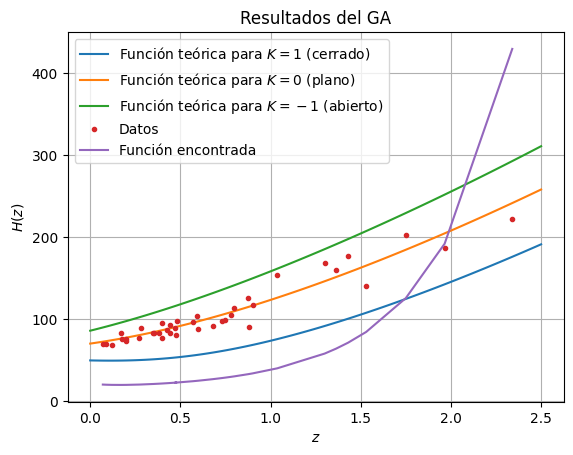

In [169]:
def H_bm(z, Omega_r, Omega_m, Omega_lambda, omega_DE, Omega_0): 
    return H_0*np.sqrt((Omega_r*(1+z)**(3*(1 + 1/3)) + Omega_m*(1+z)**3 + Omega_lambda*(1+z)**(3*(1+omega_DE)) + (1-Omega_0)*(1+z)**2))

H_0 = 70
O_r = 8.4*10**(-5)
O_m = 0.3
O_lambda = 0.7 - 8.4*10**(-5)
o_DE = -1
O_0 = [0.5, 1, 1.5]

# Se crea un arreglo de z para la función teórica
z_bu = np.linspace(0, 2.5, 100)

# hub_data_3.txt
H_teorico_plano = H_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0[1])
H_teorico_cerrado = H_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0[2])
H_teorico_abierto = H_bm(z_bu,O_r, O_m, O_lambda, o_DE, O_0[0])

plt.plot(z_bu, H_teorico_cerrado, label = 'Función teórica para $K = 1$ (cerrado)')
plt.plot(z_bu, H_teorico_plano, label = 'Función teórica para $K = 0$ (plano)')
plt.plot(z_bu, H_teorico_abierto, label = 'Función teórica para $K = -1$ (abierto)')


plt.plot(z, H, '.', label = 'Datos')
plt.plot(z, evaluada, label = 'Función encontrada')
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.title('Resultados del GA')
plt.grid(True)
plt.show()